In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73720 entries, 2019-01-01 22:00:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   73720 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


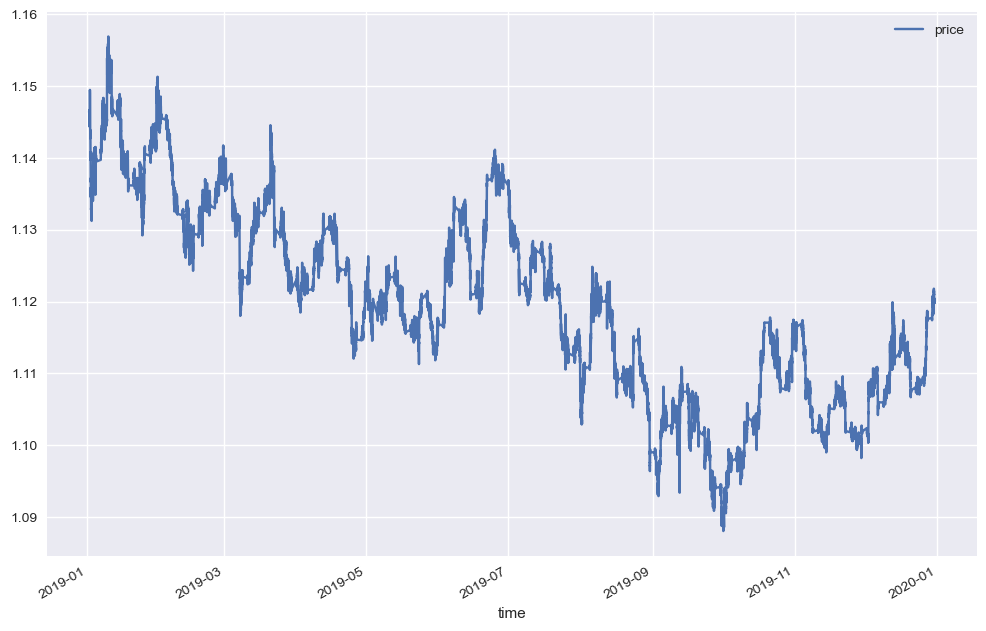

In [5]:
data.plot(figsize = (12, 8))
plt.show()

In [6]:
data["returns"] = np.log(data.div(data.shift(1)))
data

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004
2019-12-30 23:40:00+00:00,1.120210,0.000027
2019-12-30 23:45:00+00:00,1.120295,0.000076


# Linear Model to predict Financial Returns

In [7]:
data["lag1"] = data.returns.shift(1)
data.dropna(inplace = True)
data

,price,returns,lag1
time,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027


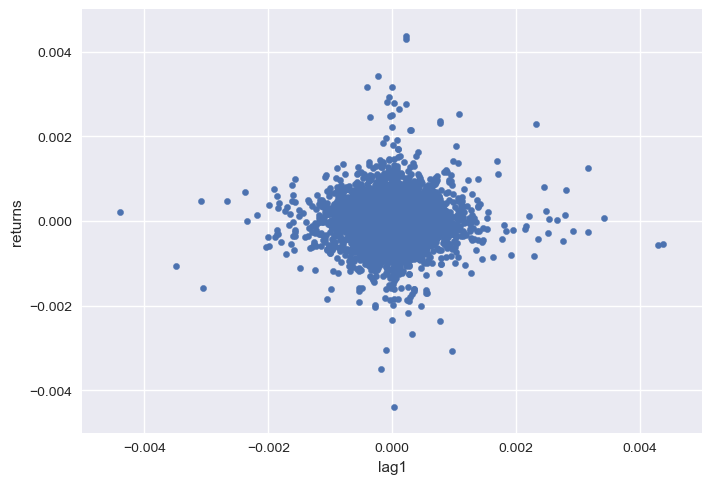

In [8]:
data.iloc[:, -2:].plot(kind = "scatter", x = "lag1", y = "returns")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression(fit_intercept = True)

In [11]:
lm.fit(data.lag1.to_frame(), data.returns)

LinearRegression()

In [12]:
slope = lm.coef_
slope

array([-0.03350837])

In [13]:
intercept = lm.intercept_
intercept

-3.244247144500933e-07

In [14]:
data["pred"] = lm.predict(data.lag1.to_frame())
data

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,6.397912e-06
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,5.525013e-07
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-3.244247e-07
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-6.462425e-06
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.283038e-06
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,3.414522e-06
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.748582e-07
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.221814e-06


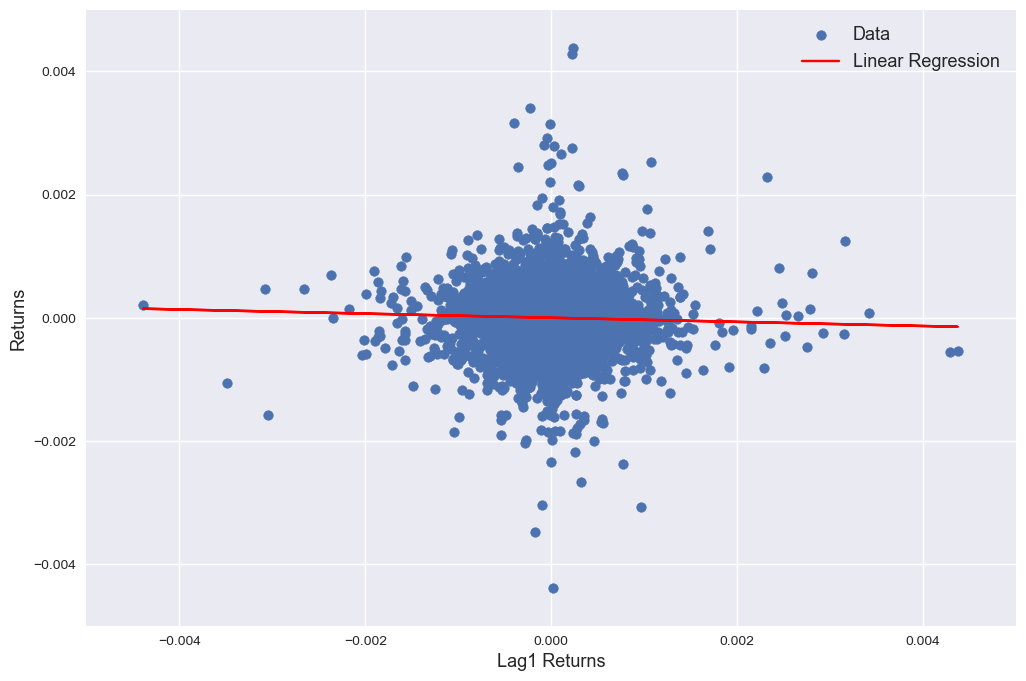

In [16]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

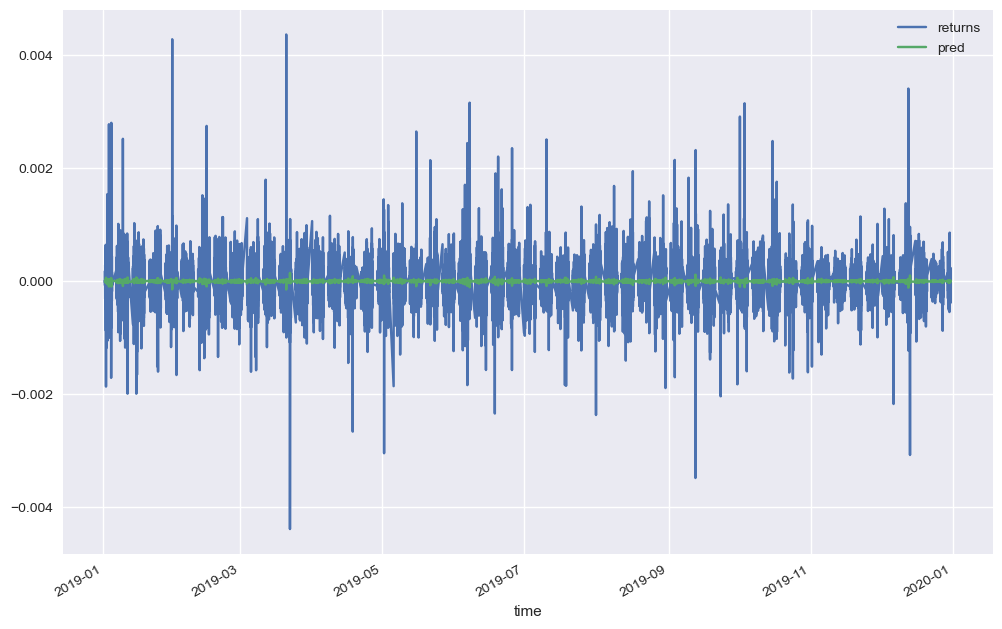

In [17]:
# model fails to predict the magnitude of returns
data[["returns", "pred"]].plot(figsize = (12,8))
plt.show()

In [18]:
# maybe the model can predict the market direction (-1 / +1)
data.pred = np.sign(data.pred)
data

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,1.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-1.0
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.0
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.0


In [19]:
np.sign(data.returns * data.pred)

time
2019-01-01 22:10:00+00:00   -1.0
2019-01-01 22:15:00+00:00    0.0
2019-01-01 22:20:00+00:00   -1.0
2019-01-01 22:25:00+00:00    1.0
2019-01-01 22:30:00+00:00   -1.0
                            ... 
2019-12-30 23:35:00+00:00   -1.0
2019-12-30 23:40:00+00:00   -1.0
2019-12-30 23:45:00+00:00   -1.0
2019-12-30 23:50:00+00:00    1.0
2019-12-30 23:55:00+00:00   -1.0
Length: 73718, dtype: float64

In [21]:
hits = np.sign(data.returns * data.pred).value_counts()
hits

 1.0    37451
-1.0    34308
 0.0     1959
dtype: int64

In [22]:
# percentage of correctly forecasted market directions
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5080306031091457

# Multiple Regression

In [23]:
df = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")
df.dropna(inplace = True)
df["returns"] = np.log(df.div(df.shift(1)))

In [5]:
lags = 5

In [25]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    df[col] = df.returns.shift(lag)
    cols.append(col)
df.dropna(inplace = True)

In [26]:
df

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [28]:
lm.fit(df[cols], df.returns)

LinearRegression()

In [29]:
lm.coef_

array([-0.03358358, -0.00243139,  0.00365238, -0.00366896, -0.00360391])

In [30]:
lm.intercept_

-3.278292441995065e-07

In [31]:
df["pred"] = lm.predict(df[cols].values)

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
df.pred = np.sign(df.pred)

In [33]:
df.pred.value_counts()

-1.0    39610
 1.0    34104
Name: pred, dtype: int64

In [34]:
hits = np.sign(df.returns * df.pred).value_counts()
hits

 1.0    37493
-1.0    34263
 0.0     1958
dtype: int64

In [35]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5086279404183737

# In-Sample backtesting and the Look-ahead bias

In [36]:
df["strategy"] = df.pred * df.returns

In [37]:
df["creturns"] = df["returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)

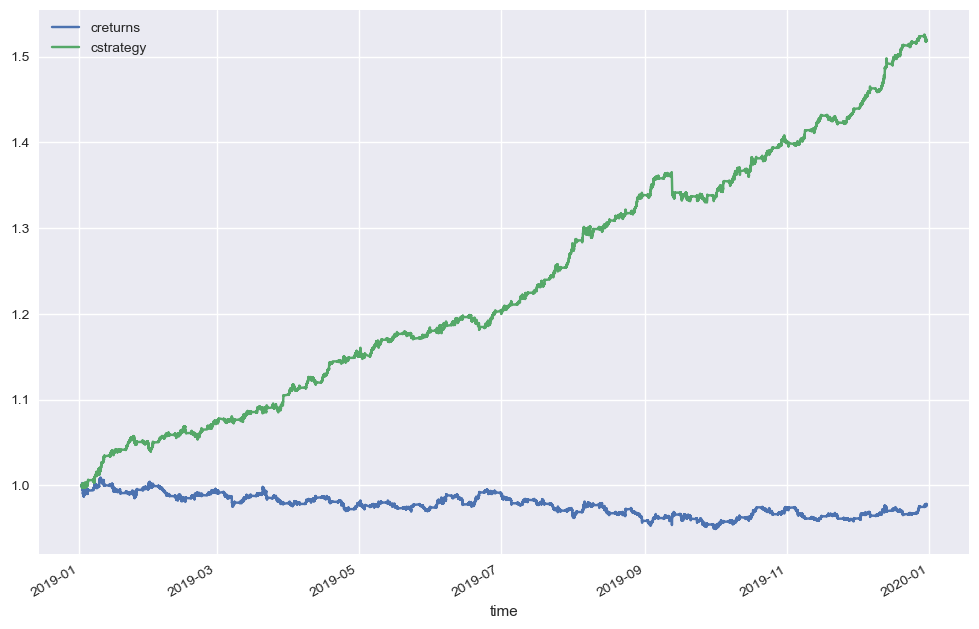

In [38]:
df[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [39]:
df["trades"] = df.pred.diff().fillna(0).abs()
df.trades.value_counts()

0.0    37100
2.0    36614
Name: trades, dtype: int64

# Out-Sample Forward Testing

In [3]:
df2 = pd.read_csv("test_set.csv", parse_dates = ["time"], index_col = "time")
df2.dropna(inplace = True)
df2["returns"] = np.log(df2.div(df2.shift(1)))

In [10]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    df2[col] = df2.returns.shift(lag)
    cols.append(col)
df2.dropna(inplace = True)

In [16]:
lm.fit(df2[cols], df2.returns)

LinearRegression()

In [17]:
df2["pred"] = lm.predict(df2[cols].values)

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
df2.pred = np.sign(df2.pred)

In [19]:
df2.pred.value_counts()

 1.0    28281
-1.0    21075
Name: pred, dtype: int64

In [20]:
hits = np.sign(df2.returns * df2.pred).value_counts()
hits

 1.0    25164
-1.0    23580
 0.0      612
dtype: int64

In [21]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5098468271334792

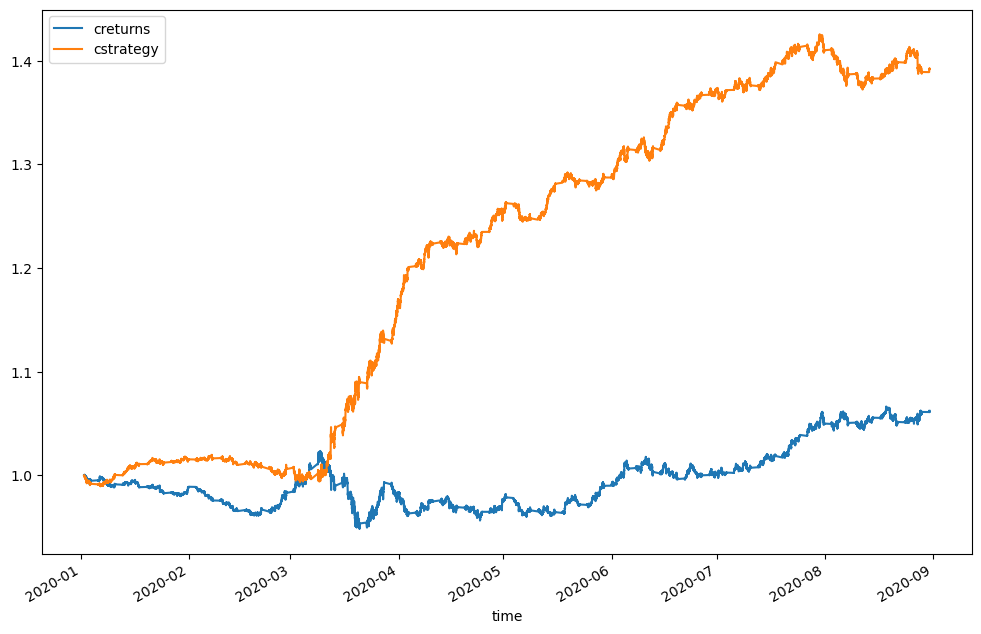

In [22]:
df2["strategy"] = df2.pred * df2.returns
df2["creturns"] = df2["returns"].cumsum().apply(np.exp)
df2["cstrategy"] = df2["strategy"].cumsum().apply(np.exp)
df2[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [23]:
df2["trades"] = df2.pred.diff().fillna(0).abs()
df2.trades.value_counts()

0.0    32504
2.0    16852
Name: trades, dtype: int64